In [1]:
using Distributions, Compat, Plots, Random, CSV, DataFrames, GLM, Printf
upscale = 1
Plots.scalefontsizes(1.6)
default(line = (:line, 0.5, 1, 2), size=(800*upscale,600*upscale))
#default(dpi = 100)
default(dpi = 500)

In [2]:
include("../KalmanFilter.jl")
import .KalmanFilter

### Daten für die folgende Experimente

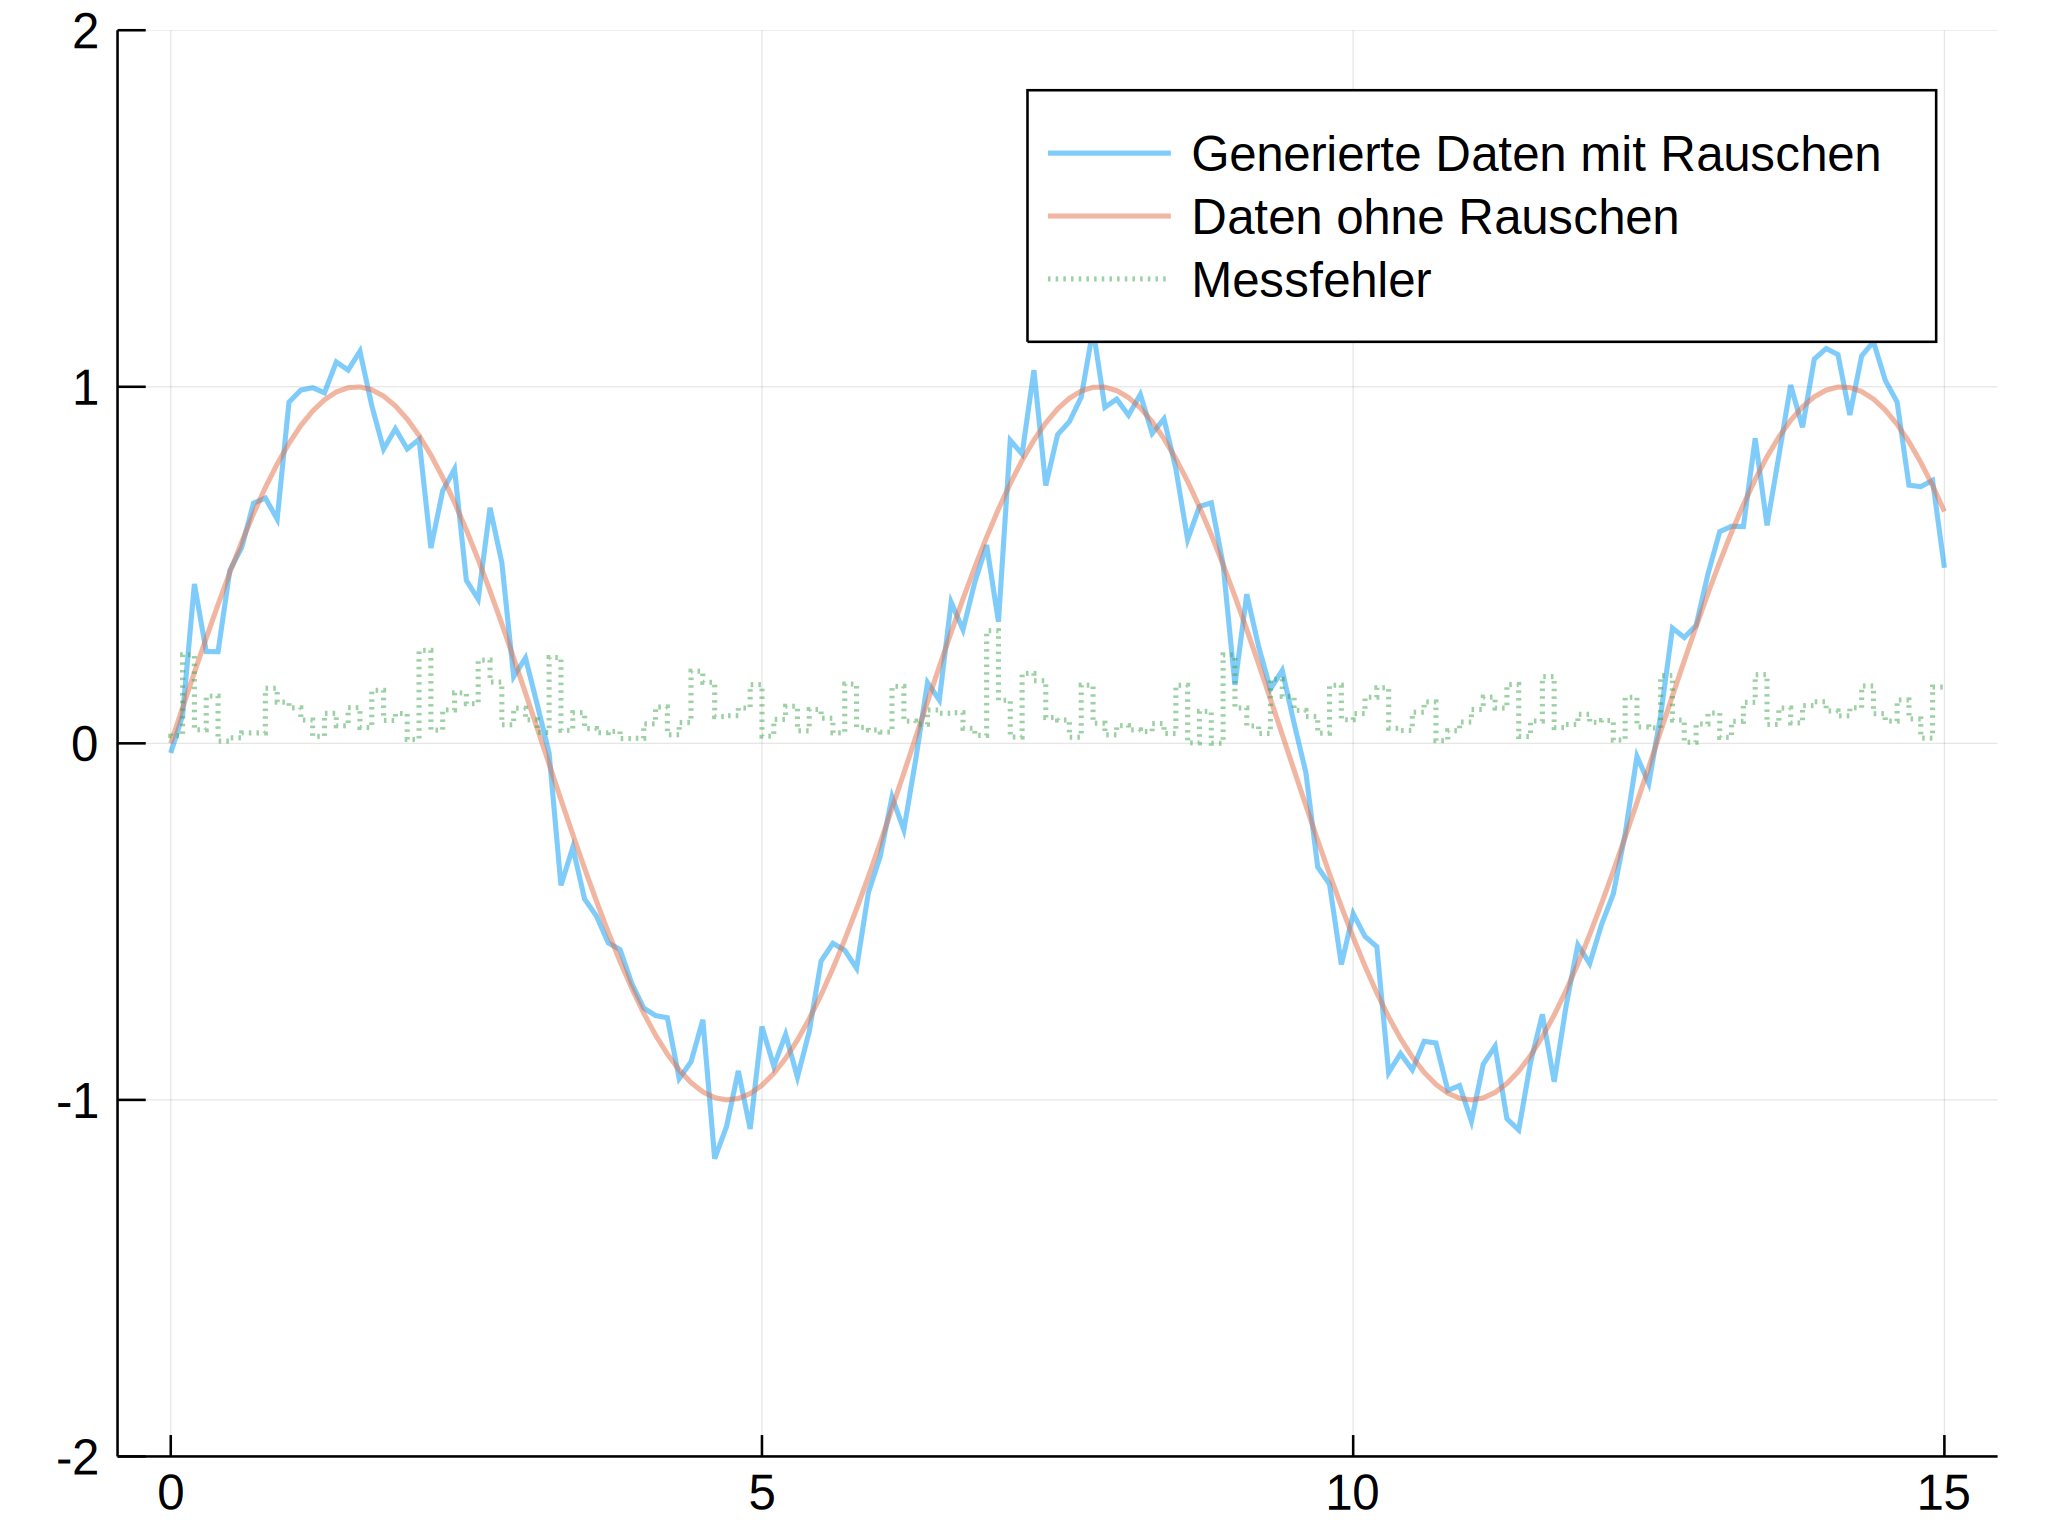

In [10]:
data_scale = 0.1
x = collect(0:data_scale:15)
y = sin.(x)
n = Normal(0, 0.1)
y_measurement = map(x -> x - rand(n), y)
p = plot(x, y_measurement, ylim = (-2, 2), label = "Generierte Daten mit Rauschen")
plot!(x, y, label = "Daten ohne Rauschen")
plot!(x, abs.(y - y_measurement), label = "Messfehler", linestyle = :dot, line = :steppre)
png("system-mit-rauschen.png")
p


In [4]:
function calculate_error(y_1, y_2)
    sum(abs.(y_1 - y_2))
end

calculate_error(y, y_measurement)

11.543693831033647

---
### Experiment: Filterung reiner Sinus Werte
Wir versuchen, nur das original Signal zu verfolgen, also diese ohne Rauschen.

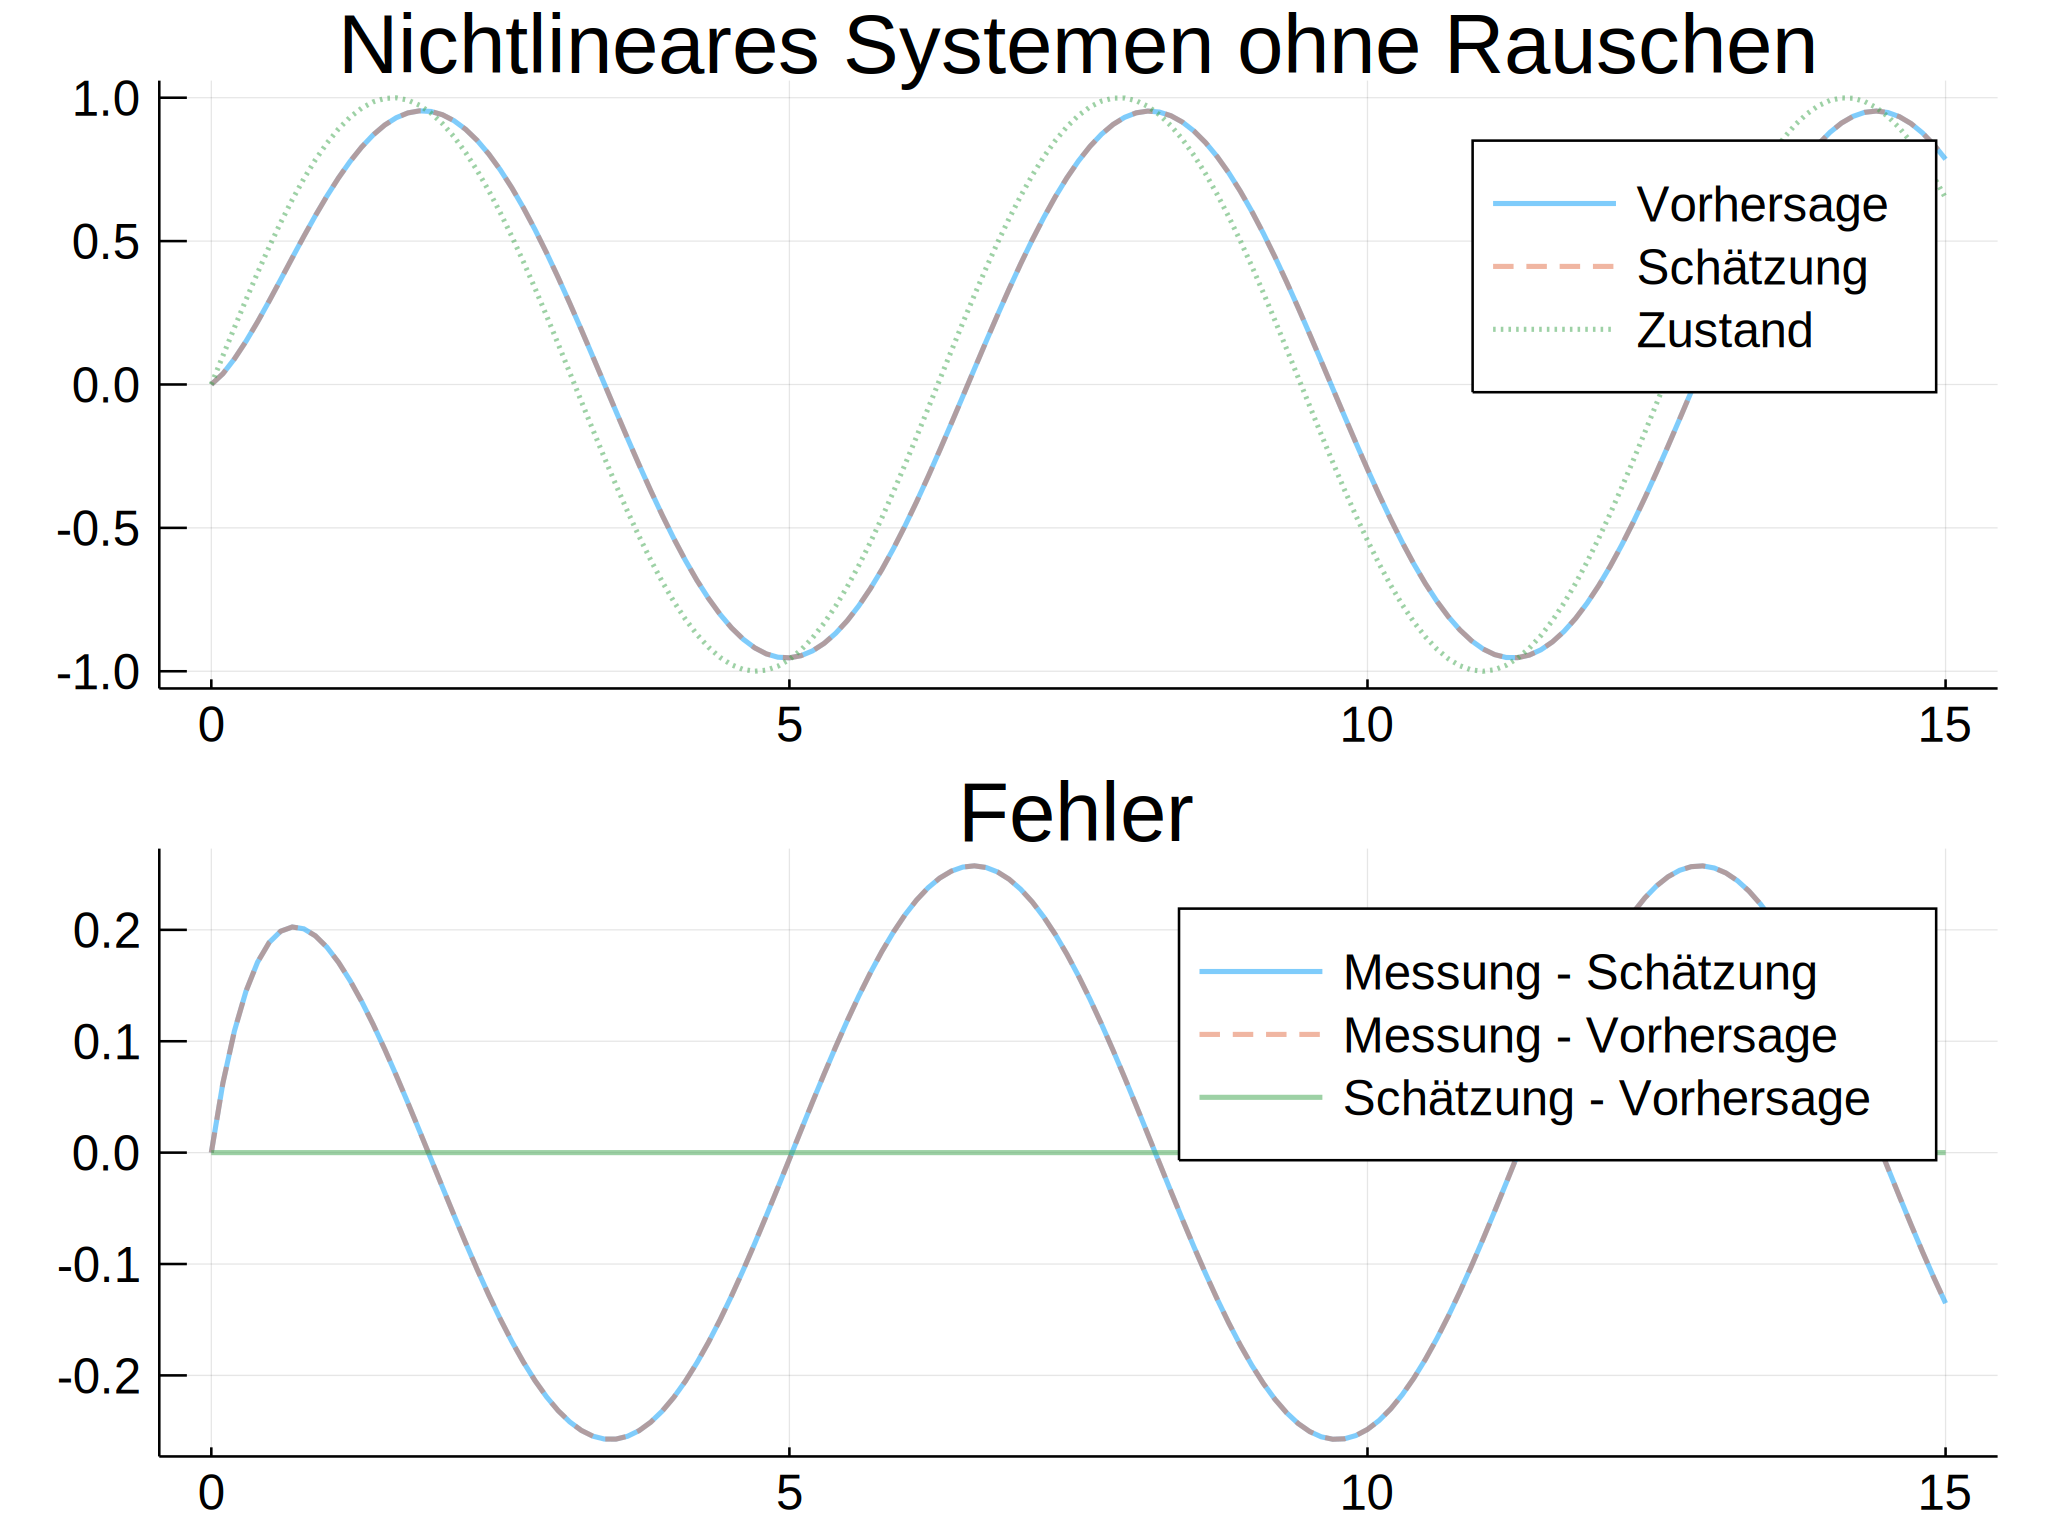

In [5]:
A = 1 # Zustandsübergangsmatrix
G = 1 # Messabbildung Matrix
Q = .05
R = 0.5

x̂_0 = 0
# x̂_0 = f(1)
Σ_0 = 0.5

model = KalmanFilter.Kalman(A, Q, G, R, x̂_0, Σ_0)

y_filtered = zeros(length(x))
y_predicted = zeros(length(x))
for (index, value) in enumerate(x)
    y_cur = y[index]
    y_filtered[index] = KalmanFilter.fusion(model, y_cur).state
    y_predicted[index] = KalmanFilter.predict(model).state
    #@printf "Step %4d    y_m %.3f    filtered %.3f    predicted %.3f    gain %.3f\n" index y_cur y_filtered[index] y_predicted[index] KalmanFilter.K(model)
end

plot_sin = plot(title = "Nichtlineares Systemen ohne Rauschen")
plot!(x, y_predicted, label = "Vorhersage")
plot!(x, y_filtered, label = "Schätzung", linestyle=:dash)
plot!(x, y, label = "Zustand", linestyle=:dot)

plot_error_filtered = plot(title = "Fehler", x, y - y_filtered, label = "Messung - Schätzung")
plot!(x, y - y_predicted, linestyle = :dash, label = "Messung - Vorhersage")
plot!(x, y_predicted - y_filtered, label = "Schätzung - Vorhersage")

p = plot(plot_sin, plot_error_filtered, layout = @layout [a;b])
png("plot-nichtlinear-ohne-rauschen.png")
p

#### Ergebnisse

In [6]:
@show calculate_error(y, y_filtered)
@show calculate_error(y, y_measurement)

calculate_error(y, y_filtered) = 23.515842413657065
calculate_error(y, y_measurement) = 11.543693831033647


11.543693831033647

---
### Experiment: Filterung sinus mit Rauschen

Wir versuchen das Originale Signal herzustellen und lassen den Kalman Filter über das Datensatz mit rauschen laufen.

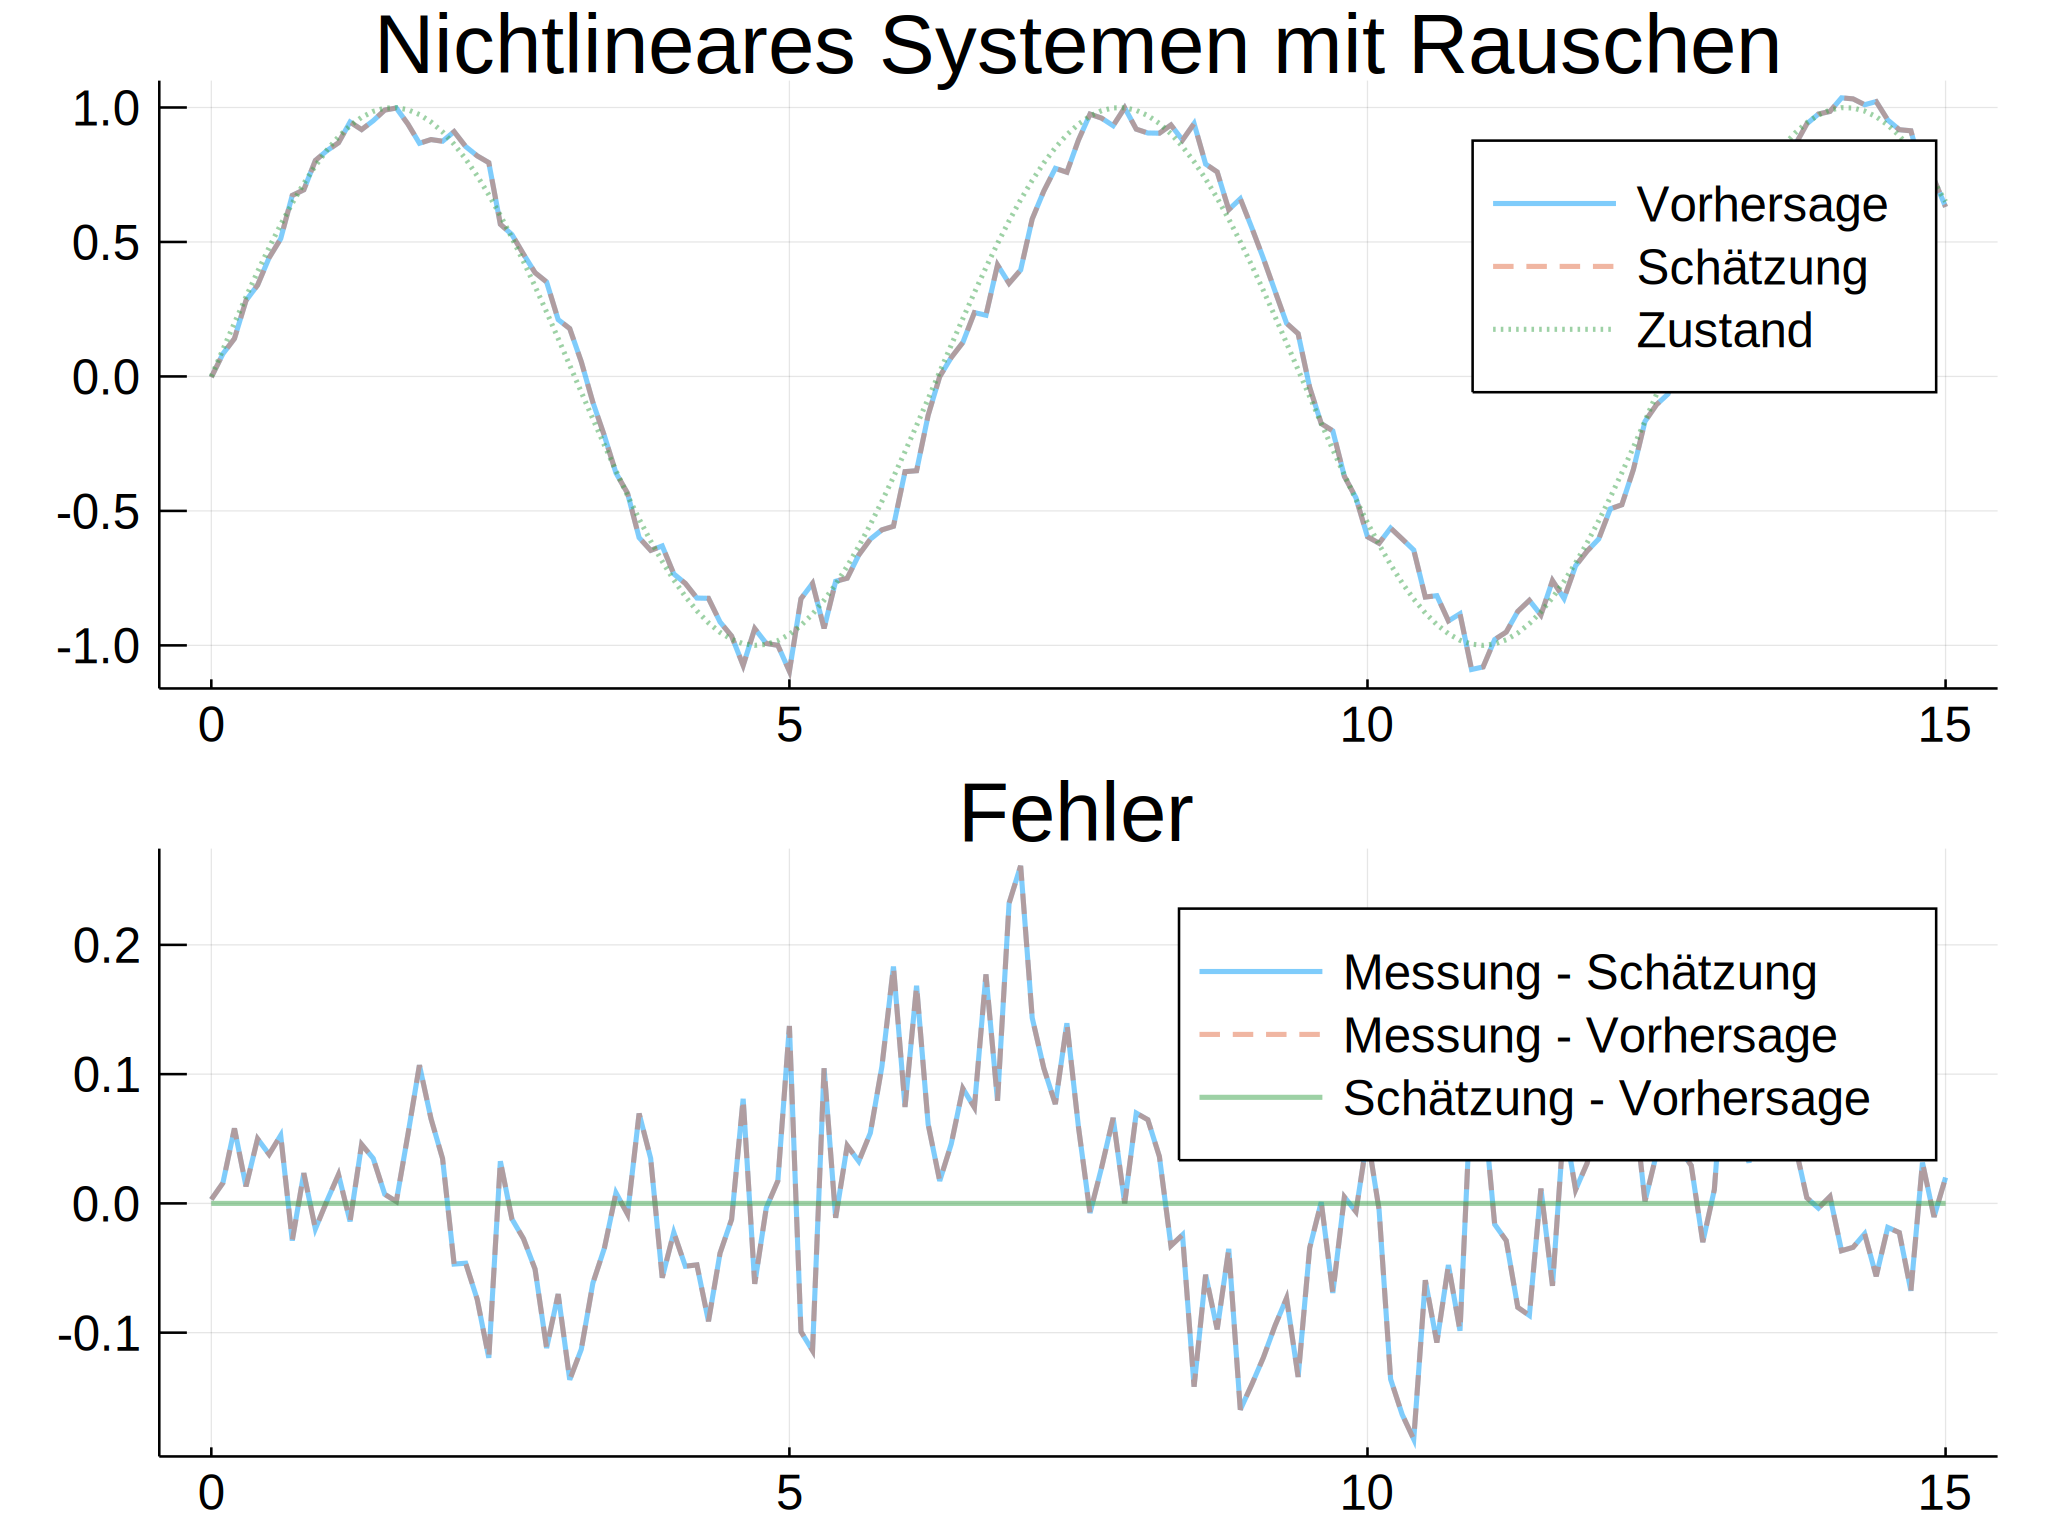

In [9]:
A = 1 # Zustandsübergangsmatrix
G = 1 # Messabbildung Matrix
Q = .8
R = 1

x̂_0 = 0
# x̂_0 = f(1)
Σ_0 = 0.5

model = KalmanFilter.Kalman(A, Q, G, R, x̂_0, Σ_0)

y_filtered = zeros(length(x))
y_predicted = zeros(length(x))
for (index, value) in enumerate(x)
    y_cur = y_measurement[index]
    y_filtered[index] = KalmanFilter.fusion(model, y_cur).state
    y_predicted[index] = KalmanFilter.predict(model).state
    #@printf "Step %4d    y_m %.3f    filtered %.3f    predicted %.3f    gain %.3f\n" index y_cur y_filtered[index] y_predicted[index] KalmanFilter.K(model)
end

plot_sin = plot(title = "Nichtlineares Systemen mit Rauschen ")
plot!(x, y_predicted, label = "Vorhersage")
plot!(x, y_filtered, label = "Schätzung", linestyle=:dash)
plot!(x, y, label = "Zustand", linestyle=:dot)

plot_error_filtered = plot(title = "Fehler", x, y - y_filtered, label = "Messung - Schätzung")
plot!(x, y - y_predicted, linestyle = :dash, label = "Messung - Vorhersage")
plot!(x, y_predicted - y_filtered, label = "Schätzung - Vorhersage")

p = plot(plot_sin, plot_error_filtered, layout = @layout [a;b])
png("plot-nichtlineares-system-mit-rauschen.png")
p

#### Ergebnisse

In [8]:
@show calculate_error(y, y_measurement)
@show calculate_error(y, y_filtered)

calculate_error(y, y_measurement) = 11.543693831033647
calculate_error(y, y_filtered) = 9.312999478860519


9.312999478860519